In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [2]:
# load the dataset
data = pd.read_csv("D:\\Ai\College.csv")
data = data.fillna(data.mean())
data

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
means = data.mean()
stds = data.std()

In [5]:
stds

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64

In [6]:
data=data.drop(columns=["Name","Private","S.F.Ratio"])


In [7]:
 import numpy as np
import pandas as pd



# Calculate the mean and standard deviation of the "Glucose" column
mean_pl = np.mean(data["Expend"])
std_deviation_pl = np.std(data["Expend"])

# Calculate the standard deviation of each value in the "Pregnancies" column
standardized_values_pl = (data["Expend"] - mean_pl) / std_deviation_pl

# Print the standardized values
print("Standardized Values:")
print(standardized_values_pl)


Standardized Values:
0     -0.501910
1      0.166110
2     -0.177290
3      1.792851
4      0.241803
         ...   
772   -0.994781
773   -0.090290
774   -0.256241
775    5.887971
776   -0.987116
Name: Expend, Length: 777, dtype: float64


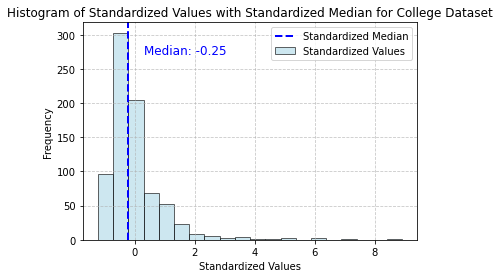

In [8]:

median_pl = np.median(data["Expend"])

# Find the standardized value of the median
standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Create a histogram for the standardized values

plt.hist(standardized_values_pl, bins=20, alpha=0.6, color='lightblue', label='Standardized Values', edgecolor='black')

# Add a vertical line to represent the standardized median in red
plt.axvline(standardized_median_pl, color='blue', linestyle='dashed', linewidth=2, label='Standardized Median')

# Set labels and title
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Values with Standardized Median for College Dataset')

# Add a legend
plt.legend()
plt.text(plt.xlim()[0] + 2.05, plt.ylim()[1] * 0.9, f'Median: {(standardized_median_pl):.2f}', color='blue', ha='left', va='top', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [9]:
# Calculate the median
median_pl = np.median(data["Expend"])

# Find the standardized value of the median
standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl

# Select the values that are less than or equal to the standardized median
left_mask = standardized_values_pl <= standardized_median_pl
left_selected_values = data["Expend"][left_mask]

# Select the values that are greater than the standardized median
right_mask = standardized_values_pl > standardized_median_pl
right_selected_values = data["Expend"][right_mask]

# Print the selected values
print("Left Selected Values:")
print(left_selected_values)
print("Right Selected Values:")
print(right_selected_values)
print(len(right_selected_values))

Left Selected Values:
0      7041
12     7940
14     8127
15     7355
17     7994
       ... 
767    6729
770    7875
772    4469
774    8323
776    4509
Name: Expend, Length: 389, dtype: int64
Right Selected Values:
1      10527
2       8735
3      19016
4      10922
5       9727
       ...  
768     8960
769    10414
771    10774
773     9189
775    40386
Name: Expend, Length: 388, dtype: int64
388


In [10]:

# Calculate the absolute difference between each value and the median
left_diff = np.abs(left_selected_values - median_pl)
right_diff = np.abs(right_selected_values - median_pl)

# Sort the values based on the absolute difference
left_sorted = left_selected_values.reset_index(drop=True)[np.argsort(left_diff)]
right_sorted = right_selected_values.reset_index(drop=True)[np.argsort(right_diff)]


# Calculate the number of values to select from each side
num_values = len(left_selected_values)

# Take the closest 75% of the left and right side values
left_75_percent = left_sorted[:int(0.85 * num_values)]
right_75_percent = right_sorted[:int(0.85 * num_values)]

# Print the 75% of the left and right side values that are closest to the median
print("Left 75%:")
print(left_75_percent)
print("Right 75%:")
print(right_75_percent)
print(len(right_75_percent))
print(len(left_75_percent))

selected_left_rows = data.loc[left_75_percent.index]
selected_right_rows = data.loc[right_75_percent.index]

# Print the selected rows
print("Selected Left Rows:")
print(selected_left_rows)
print("Selected Right Rows:")
print(selected_right_rows)

Left 75%:
27     8377
140    8367
34     8355
93     8355
240    8354
       ... 
277    5309
221    5284
287    5280
138    5212
160    5177
Name: Expend, Length: 330, dtype: int64
Right 75%:
169     8408
371     8409
75      8415
139     8420
44      8425
       ...  
295    15934
60     15954
53     16095
317    16122
214    16185
Name: Expend, Length: 330, dtype: int64
330
330
Selected Left Rows:
      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
27    7548    6791    3070         25         57        16262         1716   
140   3207    1577     490         56         87         1892            7   
34    1690    1366     662         30         61         2718         1460   
93    1083     880     291         13         34          915           80   
240   1709    1385     634         36         72         2281           50   
..     ...     ...     ...        ...        ...          ...          ...   
277   8427    7424    3441         26         59  

In [11]:
combined_dataset = pd.concat([selected_left_rows, selected_right_rows], axis=0)

# Print the combined dataset
print("Combined Dataset:")
print(combined_dataset)

Combined Dataset:
     Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
27   7548    6791    3070         25         57        16262         1716   
140  3207    1577     490         56         87         1892            7   
34   1690    1366     662         30         61         2718         1460   
93   1083     880     291         13         34          915           80   
240  1709    1385     634         36         72         2281           50   
..    ...     ...     ...        ...        ...          ...          ...   
295   355     300     142         34         65          509           44   
60   3356    1019     418         76        100         1490            8   
53   1646    1150     542         12         30         2128           82   
317   810     484     356          6         33         2155          191   
214  2464    1908     678         24         57         2693          691   

     Outstate  Room.Board  Books  Personal  PhD  Terminal

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming combined_dataset_without_variety is your dataset without the "variety" column

# Number of clusters (you can adjust this)
k = 3

# Initialize K-means with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit K-means to the data
kmeans.fit(combined_dataset)

# Predict cluster labels for each data point
clusters = kmeans.predict(combined_dataset)

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(combined_dataset, clusters)

# Print the silhouette score and cluster labels
print("Silhouette Score for {} clusters: {:.2f}".format(k, silhouette_avg))
print("Cluster Labels:", clusters)


Silhouette Score for 3 clusters: 0.50
Cluster Labels: [2 0 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 2 0 1 0 1 1 1 1 1 1 1 1 2 1 1 0 0 0 0 2 1 1 1 1 2 1 1 1 1 2
 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 2 1 2 2 0 1 2 0 1 1 1 0 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 0 2 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 2 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 2 0 1 1 1 1 1 1 1 1 0 2 1 2 0 1 1 1 1 1 1 0 2 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 0 1 2 2 0 1 1 1 1 1 1
 0 0 1 1 2 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 2 1 0 1 1 1 1 1 0 1 2 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 2 1 2 0 1 1 0 1 2 1 1 1 1 1 1 1 1 0 0 1 1 1 1 2 1
 1 0 1 1 1 1 1 1 2 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 1 2 0 0 0

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

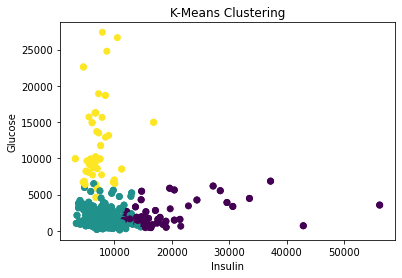

In [14]:
# Access columns by their names
feature1 = combined_dataset['Expend']
feature2 = combined_dataset['F.Undergrad']

# Create a scatter plot
plt.scatter(feature1, feature2, c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()

# Create a scatter plot

In [ ]:
# COLLEGE K MEANS

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.read_csv("D:\\Ai\College.csv")
data = data.fillna(data.mean())
# Drop the "Outcome" column
data=data.drop(columns=["Name","Private","S.F.Ratio"])


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Define a range of k values for K-Means
k_values = range(2, 11)

# Initialize variables to store outlier counts and silhouette scores
outlier_counts = []
silhouette_scores = []

# Perform K-Means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Detect and count outliers using the Mahalanobis distance method
    cluster_centers = kmeans.cluster_centers_
    mahalanobis_distances = np.sqrt(np.sum(((scaled_data - cluster_centers[cluster_labels]) ** 2), axis=1))
    threshold = np.percentile(mahalanobis_distances, 85)  # Define a threshold for outliers (e.g., 95th percentile)
    outliers = np.where(mahalanobis_distances > threshold)[0]
    outlier_counts.append(len(outliers))
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Print the number of outliers deleted for each k
for k, outliers_deleted in zip(k_values, outlier_counts):
    print(f'Number of outliers deleted for k={k}: {outliers_deleted}')

# Print the silhouette scores for each k
for k, silhouette_avg in zip(k_values, silhouette_scores):
    print(f'Silhouette score for k={k}: {silhouette_avg}')


Number of outliers deleted for k=2: 117
Number of outliers deleted for k=3: 117
Number of outliers deleted for k=4: 117
Number of outliers deleted for k=5: 117
Number of outliers deleted for k=6: 117
Number of outliers deleted for k=7: 117
Number of outliers deleted for k=8: 117
Number of outliers deleted for k=9: 117
Number of outliers deleted for k=10: 117
Silhouette score for k=2: 0.24090990214460284
Silhouette score for k=3: 0.25319310536154116
Silhouette score for k=4: 0.19157421369749053
Silhouette score for k=5: 0.19724562470322543
Silhouette score for k=6: 0.17195292755470967
Silhouette score for k=7: 0.13448501424853881
Silhouette score for k=8: 0.1337930010357383
Silhouette score for k=9: 0.13490813965147397
Silhouette score for k=10: 0.13312067372685257
